## Installation

In [2]:
%%time

! pip install wyn-pm==0.2.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 62.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
CPU times: user 52.5 ms, sys: 10.6 ms, total: 63.1 ms
Wall time: 8.23 s


## Buy/Sell Signal

In [3]:
from wyn_pm.stock_analyzer import *

In [4]:
# Example usage:
stock_analysis = StockAnalysis(ticker="TSLA")
stock_analysis.fetch_data()
stock_analysis.calculate_macd()
stock_analysis.find_crossovers(bullish_threshold=-15, bearish_threshold=15)

In [5]:
float(stock_analysis.data['Crossover'][-1]), stock_analysis.data.tail(1).to_json(orient="index")

<ipython-input-5-296a1412f21e>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  float(stock_analysis.data['Crossover'][-1]), stock_analysis.data.tail(1).to_json(orient="index")


(0.0,
 '{"1738904400000":{"Open":370.1799926758,"High":380.5458984375,"Low":369.1499938965,"Close":369.3800048828,"Volume":17007737,"Dividends":0.0,"Stock Splits":0.0,"MACD":-6.6311171514,"Signal_Line":-1.7859588468,"Crossover":0}}')

In [6]:
fig = stock_analysis.create_fig()
fig.show()

## Efficient Portfolio

In [7]:
from wyn_pm.efficient_portfolio import *

[*********************100%***********************]  6 of 6 completed


+-----------------------------------------+----------------------------------------------------------------------+
|                   Key                   |                                Value                                 |
+-----------------------------------------+----------------------------------------------------------------------+
|            Annualised Return            |                                 1.14                                 |
|          Annualised Volatility          |                                 0.54                                 |
|          Max Sharpe Allocation          |                       AAPL  MSFT  GOOGL  META   IBM   TSLA           |
|                                         |          allocation  14.35  6.05   0.84   6.8  8.01  63.95           |
|   Max Sharpe Allocation in Percentile   |                    AAPL    MSFT   GOOGL   META     IBM    TSLA       |
|                                         |      allocation  0.1435  0.0605  0.0

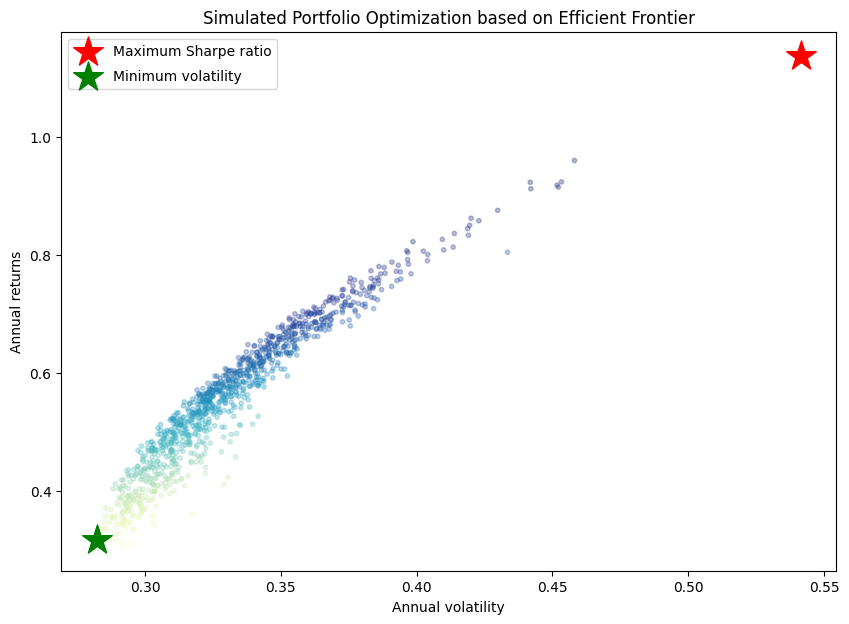

In [8]:
# Example usage:
portfolio = EfficientPortfolio(tickers=["AAPL", "MSFT", "GOOGL", "META", "IBM", "TSLA"], start_date="2020-01-01", end_date="2022-01-01", interval="1d")
stock_data = portfolio.download_stock_data()
portfolio_returns = portfolio.create_portfolio_and_calculate_returns(top_n=2)

# Calculate mean returns and covariance matrix
mean_returns = stock_data.pct_change().mean()
cov_matrix = stock_data.pct_change().cov()

# Define the number of portfolios to simulate and the risk-free rate
num_portfolios = 1000
risk_free_rate = 0.01

# Display the efficient frontier with randomly generated portfolios
fig, details = portfolio.display_simulated_ef_with_random(mean_returns.values, cov_matrix.values, num_portfolios, risk_free_rate)
plt.show()

## Momentum Strategy

In [9]:
from wyn_pm.efficient_portfolio import *

In [10]:
# Example usage:
# Test: MSFT, AAPL, NVDA, GOOG, AMZN, META, LLY, AVGO, TSLA, JPM, V, WMT, UNH, MA, PG, HD, JNJ, ORCL, MRK, COST, ABBV, BAC, CRM, AMD, NFLX, ACN, ADBE, DIS, TMO, WFC, MCD, CSCO, ABT, QCOM, INTC, INTU, IBM, AMAT, CMCSA, AXP, PFE, NOW, AMGN, MU
portfolio = EfficientPortfolio(tickers=["AAPL", "MSFT", "GOOGL", "NFLX", "IBM", "TSLA", "META", "V", "ORCL", "COST", "DIS", "WFC"], start_date="2017-01-01", end_date="2024-07-01", interval="1mo")
stock_data = portfolio.download_stock_data()
portfolio_returns = portfolio.create_portfolio_and_calculate_returns(top_n=3)

# Plot
fig = portfolio.plot_portfolio_performance(portfolio_returns, height_of_graph=600)
fig.show()

[**********************83%***************        ]  10 of 12 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[**********************92%*******************    ]  11 of 12 completedWARNING:urllib3.connectionpool:Connection pool is full, discarding connection: query2.finance.yahoo.com. Connection pool size: 10
[*********************100%***********************]  12 of 12 completed
